In [5]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def show_circles_on_map(data, latitude_column, longitude_column, color):

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

show_circles_on_map(df.sample(10000), "lat", "lng", "blue")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train_hak.csv')

C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
from pandas_profiling import ProfileReport

In [10]:
# ProfileReport(df, title="Pandas Profiling Report")

In [23]:
uniques = pd.unique(df.floor[df.floor.notna()])
uniques

array([3.0, 4.0, -1.0, 1.0, 14.0, 2.0, 8.0, -2.0, 6.0, 10.0, 5.0, 16.0,
       19.0, 7.0, 9.0, 58.0, 24.0, 18.0, 26.0, 17.0, 48.0, 11.0, -3.0,
       15.0, 22.0, 60.0, 12.0, 21.0, 35.0, 28.0, 38.0, 39.0, 13.0, 81.0,
       44.0, 82.0, 25.0, 45.0, 47.0, 23.0, 37.0, 29.0, 113.0, 78.0, 42.0,
       69.0, 27.0, 46.0, 53.0, 80.0, 70.0, 76.0, 64.0, 30.0, 73.0, 77.0,
       52.0, 67.0, 65.0, 20.0, 40.0, 49.0, 75.0, 93.0, 94.0, 91.0, 72.0,
       79.0, 84.0, 92.0, 33.0, 66.0, 90.0, 31.0, 36.0, 61.0, 71.0, 68.0,
       51.0, 97.0, 43.0, 95.0, 85.0, 50.0, 0.0, 62.0, 54.0, 74.0, 57.0,
       41.0, 34.0, 59.0, 56.0, 123.0, 55.0, 83.0, '27.0', '1.0', '5.0',
       '-1.0', '67.0', '2.0', '0.0', '4.0', '6.0', '3.0', '15.0', '10.0',
       '11.0', '30.0', '12.0', '-2.0', '14.0', '36.0', '8.0', '50.0',
       '17.0', '19.0', '37.0', '68.0', '7.0', '42.0', '9.0', '16.0',
       '20.0', '53.0', '91.0', '84.0', '38.0', '21.0', '48.0', '22.0',
       '23.0', '1', '18.0', 'подвал, 1', '2', 'подвал', 'цоколь

In [21]:
# for a in uniques:
#     if isinstance(a, float):
#         print(a)
df[df.floor == 123]

city floor          id        lat        lng  \
213513  Саратов   123  COL_218186  51.552345  46.019264   

        osm_amenity_points_in_0.001  osm_amenity_points_in_0.005  \
213513                            1                           14   

        osm_amenity_points_in_0.0075  osm_amenity_points_in_0.01  \
213513                            45                          98   

        osm_building_points_in_0.001  ...  reform_mean_floor_count_1000  \
213513                             0  ...                      4.018018   

        reform_mean_floor_count_500  reform_mean_year_building_1000  \
213513                     1.473684                     1947.198198   

        reform_mean_year_building_500               region  total_square  \
213513                    1925.736842  Саратовская область        5245.0   

        street        date realty_type  price_type  
213513  S25417  2020-07-05          10           0  

[1 rows x 77 columns]

In [26]:
import folium
m = folium.Map(location=(51.552345, 46.019264), zoom_start=100)


In [71]:
vc = df.floor.value_counts(dropna=False)
dff1 = pd.DataFrame(vc).reset_index()
dff1['type'] = dff1['index'].apply(type)
dff1.columns = ['floor', 'num', 'type']
dff1

floor     num             type
0         NaN  176237  <class 'float'>
1           1   70393  <class 'float'>
2           2    7750  <class 'float'>
3          -1    7738  <class 'float'>
4           3    3516  <class 'float'>
..        ...     ...              ...
202    5 этаж       1    <class 'str'>
203        90       1  <class 'float'>
204      23.0       1    <class 'str'>
205  1-й, 2-й       1    <class 'str'>
206    Цоколь       1    <class 'str'>

[207 rows x 3 columns]

In [99]:
dff1['feature_type'] = None
dff1['float_floor'] = 0
dff1['floor'].loc[dff1.floor == 'цоколь'] = -1
dff1['floor'].loc[dff1.floor == 'подвал'] = -1
dff1['floor'].loc[dff1.floor == '1, подвал'] = -1
dff1['floor'].loc[dff1.floor == '1,2'] = 1
dff1['feature_type'].loc[dff1.floor.apply(lambda x: isinstance(x, float))] = 'float'
dff1['feature_type'].loc[dff1.floor.apply(lambda x: isinstance(x, int))] = 'int'
dff1['feature_type'].loc[dff1.floor.apply(lambda x: isinstance(x, str))] = 'str'
dff1['float_floor'].loc[(dff1.feature_type == 'float') | (dff1.feature_type == 'int')] = dff1.loc[(dff1.feature_type == 'float') | (dff1.feature_type == 'int')]['floor']
dff1['float_floor'].loc[(dff1.feature_type == 'str') & (dff1.num > 6)] = dff1.loc[(dff1.feature_type == 'str') & (dff1.num > 6)]['floor'].apply(lambda x: float(x))
dff1['feature_type'].loc[dff1.num <= 6] = 'bad'
dff1['feature_type'].loc[dff1.floor.isna()] = 'na'
dff1

C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

floor     num             type feature_type float_floor
0         NaN  176237  <class 'float'>           na         NaN
1           1   70393  <class 'float'>        float           1
2           2    7750  <class 'float'>        float           2
3          -1    7738  <class 'float'>        float          -1
4           3    3516  <class 'float'>        float           3
..        ...     ...              ...          ...         ...
202    5 этаж       1    <class 'str'>          bad           0
203        90       1  <class 'float'>          bad          90
204      23.0       1    <class 'str'>          bad           0
205  1-й, 2-й       1    <class 'str'>          bad           0
206    Цоколь       1    <class 'str'>          bad           0

[207 rows x 5 columns]

In [101]:
df2 = df.merge(dff1[['floor', 'feature_type', 'float_floor']], how='left', on='floor')

In [115]:
df2[['float_floor']] = df2[['float_floor']].fillna(0)
df2[['feature_type']] = df2[['feature_type']].fillna('bad')

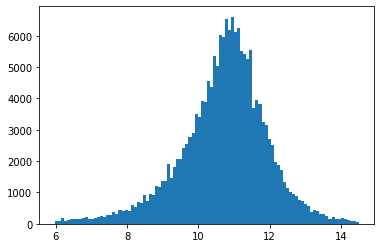

In [124]:
df_na_floors = df2[df2.feature_type == 'na']
plt.hist(np.log1p(df_na_floors.per_square_meter_price), bins=100);

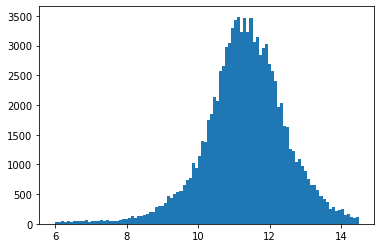

In [125]:
df_float_floors = df2[df2.feature_type == 'float']
plt.hist(np.log1p(df_float_floors.per_square_meter_price), bins=100);

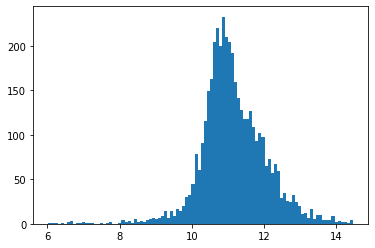

In [126]:
df_float_floors = df2[df2.feature_type == 'str']
plt.hist(np.log1p(df_float_floors.per_square_meter_price), bins=100);

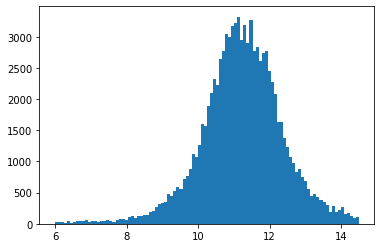

In [127]:
df_float_floors = df2[df2.feature_type == 'int']
plt.hist(np.log1p(df_float_floors.per_square_meter_price), bins=100);

In [135]:
df2['floor_isna'] = (df2.feature_type == 'na').astype(int)
df2['high_floor'] = (df2.float_floor > 3).astype(int)
df2['underground_floor'] = (df2.float_floor <= 0).astype(int)
df2['very_high_floor'] = (df2.float_floor > 10).astype(int)

In [137]:
df3 = df2.drop(['floor', 'feature_type'], axis=1)

In [140]:
df3.isna().sum()[df3.isna().sum() > 0] / len(df3)

osm_city_nearest_population       0.000169
reform_house_population_1000      0.046379
reform_house_population_500       0.089534
reform_mean_floor_count_1000      0.052992
reform_mean_floor_count_500       0.098782
reform_mean_year_building_1000    0.051551
reform_mean_year_building_500     0.097137
street                            0.006642
dtype: float64

In [285]:
import math
def dirty_floor_to_num(a):
    if not isinstance(a, str) and math.isnan(a):
        return 0
    if isinstance(a, int) or isinstance(a, float):
        return a
    if a == 'цоколь' or a == '1, цоколь' or a == 'подвал':
        return -1 
    if a.isdigit():
        return float(a)
    else:
        return 0

In [154]:
df1 = df.copy()
df1['real_floor'] = df1.floor.apply(dirty_floor_to_num)

In [158]:
df1['floor_isna'] = df1.floor.isna().astype(int)
df1['high_floor'] = (df1.real_floor > 3).astype(int)
df1['underground_floor'] = (df1.real_floor <= 0).astype(int)
df1['very_high_floor'] = (df1.real_floor > 10).astype(int)

In [163]:
def id_to_ind(a):
    return a.apply(lambda x: int(x[4:]))

def ind_to_id(a):
    return a.apply(lambda x: 'COL_' + str(x))

In [3]:
def ne_v_jope_generate(dataframe, alpha=2, beta=1, gamma=1):
    df1 = dataframe.copy()
    df2 = df1[['lat', 'lng', 'region']].groupby('region').mean().reset_index()
    df3 = df1[['osm_city_nearest_population', 'region']].groupby('region').max().reset_index()
    df4 = df2.merge(df3, on='region')
    df4.columns = ['region', 'lat_center', 'lng_center', 'pop']
    print('ok')

    def func(a):
        x = a.lat
        y = a.lng
        dist_component = np.exp(-alpha * ((df4.lat_center - x) ** 2 + (df4.lng_center - y) ** 2) ** (gamma / 2))
        weight_component = df4['pop'] ** beta
        return (dist_component * weight_component).sum()

    df1['ne_v_jope'] = df1.apply(func, axis=1)

    return df1


In [38]:
a = set([1, 2])
b = pd.Series([1, 2, 3, 4])
b[b.isin(a)]

0    1
1    2
dtype: int64

In [30]:
def ne_v_jope_generate(dataframe, alpha=2, beta=1, gamma=1):
    df1 = dataframe.copy()
    df2 = df1[['lat', 'lng', 'region']].groupby('region').mean().reset_index()
    df3 = df1[['osm_city_nearest_population', 'region']].groupby('region').max().reset_index()
    df4 = df2.merge(df3, on='region')
    df4.columns = ['region', 'lat_center', 'lng_center', 'pop']
    print('ok')

    def func(a):
        x = a.lat
        y = a.lng
        return np.sum(np.exp(-alpha * ((df4.lat_center - x) ** 2 + (df4.lng_center - y) ** 2) ** (gamma / 2)) * df4['pop'] ** beta)


    # df1['ne_v_jope'] = df1.apply(func, axis=1)
    df1['ne_v_jope'] = df1.apply(func, axis=1)

    return df1


In [19]:
ne_v_jope_generate(df.sample(10000))

ok


city floor          id  \
6060                                    Березовый   NaN    COL_6174   
70117                                 Новоалтайск   NaN   COL_71766   
135340                                  Краснодар   NaN  COL_138447   
122222                               Новороссийск   NaN  COL_125036   
20667                             Санкт-Петербург   NaN   COL_21163   
...                                           ...   ...         ...   
185309                               Магнитогорск   NaN  COL_189393   
235836                                    Саранск   NaN  COL_240930   
233679  Воскресенск городской округ, д. Маришкино     2  COL_238739   
171173                                     Самара   NaN  COL_175048   
147377                             Ростов-на-Дону     1  COL_150759   

              lat        lng  osm_amenity_points_in_0.001  \
6060    45.152800  39.003307                            1   
70117   53.455677  83.909170                            0   
135340  45.055542  39.032043                            4   
122222  44.715057  37.749554                            0   
20667   59.988440  30.201849                            2   
...           ...        ...                          ...   
185309  53.415080  58.993954                            1   
235836  54.195282  45.164684                            3   
233679  55.354053  38.613660                            0   
171173  53.187270  50.200455                            0   
147377  47.321580  39.686825                            5   

        osm_amenity_points_in_0.005  osm_amenity_points_in_0.0075  \
6060                              8                            22   
70117                             8                            18   
135340                           15                            36   
122222                            1                             2   
20667                            66                           104   
...                             ...                           ...   
185309                           43                            71   
235836                           19                            81   
233679                            0                             1   
171173                           13                            20   
147377                           12                            13   

        osm_amenity_points_in_0.01  osm_building_points_in_0.001  ...  \
6060                            31                             0  ...   
70117                           20                             0  ...   
135340                          75                             0  ...   
122222                           2                             0  ...   
20667                          157                             0  ...   
...                            ...                           ...  ...   
185309                         133                             0  ...   
235836                         117                             0  ...   
233679                           2                             0  ...   
171173                          32                             0  ...   
147377                          13                             0  ...   

        reform_mean_floor_count_500  reform_mean_year_building_1000  \
6060                       5.000000                     1981.684211   
70117                           NaN                             NaN   
135340                    17.961538                     2012.587156   
122222                     6.285714                     1968.250000   
20667                     14.692308                     1997.882353   
...                             ...                             ...   
185309                     4.818182                     1955.518519   
235836                     3.375000                     1964.712871   
233679                          NaN                             NaN   
171173                     5.406250        

In [13]:
def preprocess(dataframe):
    df1 = dataframe.copy()

    import math
        
            
    def dirty_floor_to_num(a):
        if not isinstance(a, str) and math.isnan(a):
            return 0
        if a == 'цоколь' or a == '1, цоколь' or a == 'подвал':
            return -1 
        else:
            try:
                float(a)
                return float(a)
            except ValueError:
                return 0
    
    df1['real_floor'] = df1.floor.apply(dirty_floor_to_num)
    df1['floor_unknown'] = (df1.real_floor == 0).astype(int)
    df1['floor_first'] = (df1.real_floor == 1).astype(int)
    df1['floor_second'] = (df1.real_floor == 2).astype(int)
    df1['floor_underground'] = (df1.real_floor == -1).astype(int)
    df1['floor_3-5'] = ((df1.real_floor >= 3) & (df1.real_floor <= 5)).astype(int)
    df1['floor_high'] = (df1.real_floor >= 10).astype(int)
    df1.drop(['id', 'floor', 'real_floor'], axis=1, inplace=True)
    
    return df1
    

In [26]:
def bin_cities(df):
    df1 = df.copy()
    df1 = df1[df1.price_type == 1]
    df_big_cities = pd.DataFrame(df1.city.value_counts()[:10])
    df_big_cities['big_city'] = True
    df_middle_cities = pd.DataFrame(df1.city.value_counts()[10:50])
    df_middle_cities['middle_city'] = True
    df2 = df1.merge(df_big_cities.drop('city', axis=1), how='left', left_on='city', right_index=True)
    df3 = df2.merge(df_middle_cities.drop('city', axis=1), how='left', left_on='city', right_index=True)
    df3[['big_city', 'middle_city']] = df3[['big_city', 'middle_city']].fillna(False)
    df3['top_city'] = 'rare'
    df3.loc[df3.big_city | df3.middle_city, 'top_city'] = df3.loc[df3.big_city | df3.middle_city]['city']
    df3[['big_city', 'middle_city']] = df3[['big_city', 'middle_city']].astype(int)
    return df3.drop('city', axis=1)
    # df3[['big_city', 'middle_city']] = df3[['big_city', 'middle_city']].fillna(0)

In [ ]:
def preprocess(dataframe, val=False):
    global big_cities_set
    global middle_cities_set
    df0 = dataframe.copy()
    if not val:
        df1 = df0[df0.price_type == 1]
        df_big_cities = pd.DataFrame(df1.city.value_counts()[:10])
        df_big_cities['big_city'] = True
        df_middle_cities = pd.DataFrame(df1.city.value_counts()[10:50])
        df_middle_cities['middle_city'] = True
        df2 = df0.merge(df_big_cities.drop('city', axis=1), how='left', left_on='city', right_index=True)
        df3 = df2.merge(df_middle_cities.drop('city', axis=1), how='left', left_on='city', right_index=True)
        df3[['big_city', 'middle_city']] = df3[['big_city', 'middle_city']].fillna(False)
        df3['top_city'] = 'rare'
        df3.loc[df3.big_city | df3.middle_city, 'top_city'] = df3.loc[df3.big_city | df3.middle_city]['city']
        df3[['big_city', 'middle_city']] = df3[['big_city', 'middle_city']].astype(int)

        big_cities_set = set(pd.unique(df3.city[df3.big_city == 1]))
        middle_cities_set = set(pd.unique(df3.city[df3.middle_city == 1]))
        return df3.drop('city', axis=1)
    else:
        df1 = df0
        df1.loc[df1.city.isin(big_cities_set), 'big_city'] = True
        # df1.city[df1.city.isin(big_cities_set)]
        df1.loc[df1.city.isin(middle_cities_set), 'middle_city'] = True
        df1[['big_city', 'middle_city']] = df1[['big_city', 'middle_city']].fillna(False)
        df1['top_city'] = 'rare'
        df1.loc[(df1.city.isin(big_cities_set) | df1.city.isin(middle_cities_set)), 'top_city'] = df1.city[(df1.city.isin(big_cities_set) | df1.city.isin(middle_cities_set))]

        return df1.drop('city', axis=1)

In [29]:
df2 = bin_cities(df)
df2.top_city.value_counts()

Москва               55996
rare                 53244
Санкт-Петербург      18906
Краснодар            13009
Екатеринбург          8580
                     ...  
Реутов                 271
Альметьевск            265
Каменск-Уральский      265
Коломна                262
Жуковский              260
Name: top_city, Length: 101, dtype: int64

In [37]:
pd.unique(df.region)

array(['Пермский край', 'Московская область', 'Ярославская область',
       'Кемеровская область', 'Москва', 'Самарская область', 'Татарстан',
       'Саратовская область', 'Краснодарский край',
       'Свердловская область', 'Брянская область', 'Башкортостан',
       'Калининградская область', 'Челябинская область',
       'Воронежская область', 'Томская область', 'Санкт-Петербург',
       'Ростовская область', 'Орловская область', 'Тульская область',
       'Белгородская область', 'Нижегородская область',
       'Вологодская область', 'Мордовия', 'Омская область',
       'Алтайский край', 'Иркутская область', 'Удмуртия',
       'Ставропольский край', 'Ханты-Мансийский АО', 'Пензенская область',
       'Тюменская область', 'Ленинградская область',
       'Ульяновская область', 'Калужская область', 'Красноярский край',
       'Смоленская область', 'Костромская область',
       'Волгоградская область', 'Кировская область', 'Курская область',
       'Адыгея', 'Ивановская область', 'Коми'

In [16]:
df2 = df1[df1.price_type == 1]
df2[['floor_unknown', 'floor_first', 'floor_second', 'floor_underground', 'floor_3-5', 'floor_high']].sum() / len(df2)

floor_unknown        0.576675
floor_first          0.264634
floor_second         0.046517
floor_underground    0.048742
floor_3-5            0.046294
floor_high           0.005342
dtype: float64

In [17]:
df2 = df1[df1.price_type == 0]
df2[['floor_unknown', 'floor_first', 'floor_second', 'floor_underground', 'floor_3-5', 'floor_high']].sum() / len(df2)

floor_unknown        0.634532
floor_first          0.261984
floor_second         0.028939
floor_underground    0.028856
floor_3-5            0.026488
floor_high           0.008903
dtype: float64

In [329]:
def func(x):
    if not isinstance(x, int) and not isinstance(x, float) and not x.replace('.','',1).isdigit():
        return True
    return False

dff2 = df.floor[df.floor.apply(func)].value_counts()

In [337]:
df1.real_floor.value_counts(dropna=False)[:20]

 0.0     177277
 1.0      73313
 2.0       8176
-1.0       8163
 3.0       3731
 4.0       2306
 5.0       1463
-2.0        787
 6.0        709
 7.0        689
 8.0        353
 9.0        310
 10.0       251
 11.0       185
 12.0       139
 15.0       116
 17.0       103
 20.0       101
Name: real_floor, dtype: int64

In [333]:
df1.real_floor

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
279787    1.0
279788    1.0
279789    3.0
279790    1.0
279791    1.0
Name: real_floor, Length: 279792, dtype: float64

In [231]:
df_big_cities = pd.DataFrame(df1.city.value_counts()[:20])
df_big_cities['big_city'] = 1.0
df_middle_cities = pd.DataFrame(df1.city.value_counts()[20:100])
df_middle_cities['middle_city'] = 1.0



In [240]:
df2 = df1.merge(df_big_cities.drop('city', axis=1), how='left', left_on='city', right_index=True)
df3 = df2.merge(df_middle_cities.drop('city', axis=1), how='left', left_on='city', right_index=True).drop('city', axis=1)

In [241]:
# df3[['big_city', 'middle_city']] = df3[['big_city', 'middle_city']].fillna(0)
df3

lat        lng  osm_amenity_points_in_0.001  \
0       57.998207  56.292797                            4   
1       55.574284  39.543835                            3   
2       57.619140  39.850525                            1   
3       53.897083  87.108604                            0   
4       55.802590  37.487110                            1   
...           ...        ...                          ...   
279787  56.459183  84.979334                            2   
279788  59.936954  30.356383                           10   
279789  54.729233  20.514968                            0   
279790  55.360680  86.081460                            5   
279791  58.592915  49.677439                            1   

        osm_amenity_points_in_0.005  osm_amenity_points_in_0.0075  \
0                                19                            35   
1                                24                            37   
2                                30                            67   
3                                 0                             5   
4                                23                            64   
...                             ...                           ...   
279787                           33                           111   
279788                          274                           718   
279789                           12                            34   
279790                           57                           100   
279791                           23                            64   

        osm_amenity_points_in_0.01  osm_building_points_in_0.001  \
0                               52                             0   
1                               59                             0   
2                              128                             0   
3                               21                             0   
4                              153                             0   
...                            ...                           ...   
279787                         222                             0   
279788                        1340                             0   
279789                          84                             0   
279790                         134                             0   
279791                         113                             0   

        osm_building_points_in_0.005  osm_building_points_in_0.0075  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              1   
3                                  0                              0   
4                                  1                              1   
...                              ...                            ...   
279787                             0                              1   
279788                             2                              5   
279789                             2                              2   
279790                             0                              0   
279791                             0                              0   

        osm_building_points_in_0.01  ...        date  realty_type  price_type  \
0                                 0  ...  2020-01-05           10           0   
1                                 1  ...  2020-01-05           10           0   
2                                 1  ...  2020-01-05          110           0   
3                                 1  ...  2020-01-05          110           0   
4                                 1  ...  2020-01-05           10           0   
...                             ...  ...         ...          ...         ...   
279787                            1  ...  2020-08-23           10           1   
279788                           16  ...  2020-08-23          110           1   
279789                            2  ...  2020-08-23 

In [228]:
xx = []
yy = []
for i in range(20, 80):
    top_i = i
    xx.append(top_i)
    yy.append(df1.city.value_counts()[top_i])


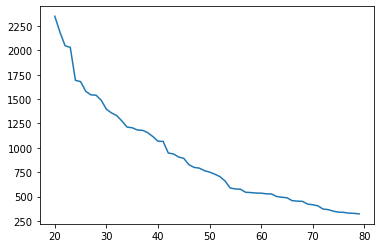

In [229]:
plt.plot(xx, yy)